In [108]:
import scipy.stats as si
import math
import numpy as np
import numpy.random as npr
from math import log, sqrt, exp
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import scipy.stats as scs

In [109]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


# Option price

An option price refers to the amount paid when buying (purchasing) or selling (writing) an option contract. Options grant the right to buy or sell a specific underlying asset (e.g., stocks, indices, commodities, etc.) at a predetermined price at a future date. Since this contract provides a right, a certain price must be paid to acquire it.The option price is also known as the option premium.


Basic Concept of Options
Options are primarily divided into two types:

- Call Option
A call option gives the holder the right to buy an asset at a predetermined price (strike price) in the future.


- Put Option
A put option gives the holder the right to sell an asset at a predetermined price (strike price) in the future.

In this practice, conducted a Monte Carlo simulation to estimate option prices and verify their accuracy.

The Black-Scholes-Merton (BSM) model serves two main purposes:

It provides a theoretical framework to calculate option prices analytically.
It describes the probability distribution of future stock prices based on stochastic processes.


# Simulation

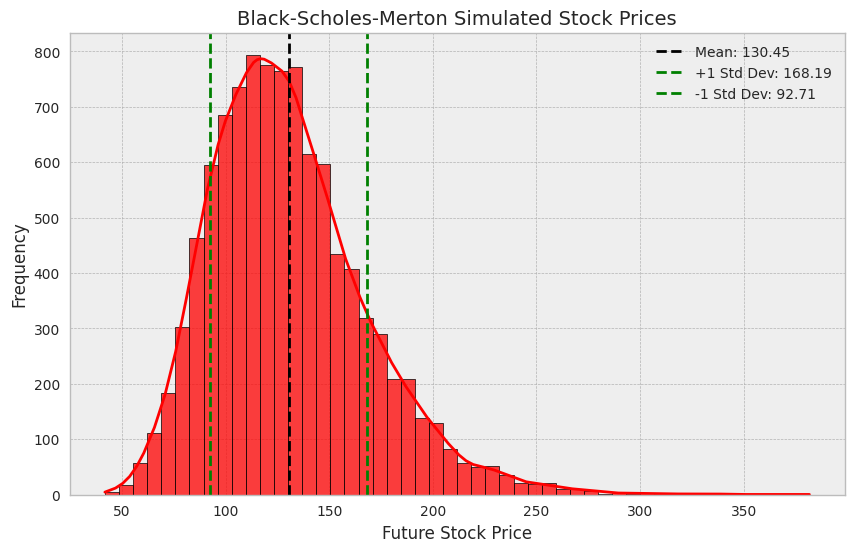

In [188]:
# Simulation parameters
S0 = 118.28  # Initial stock price
ir = 0.05  # Risk-free interest rate (5%)
V = 0.2  # Volatility (20%)
T = 2.0  # Time to maturity (years)
I = 10000  # Number of Monte Carlo simulations

# Generate random numbers (standard normal distribution)
Z = npr.standard_normal(I)

ST = S0 * np.exp((ir - 0.5 * V ** 2) * T + V * math.sqrt(T) * Z)

# Visualization of simulation results (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(ST, bins=50, kde=True, color="red", edgecolor="black", alpha=0.75)

# Calculate mean and standard deviation
mean_ST = np.mean(ST)
std_ST = np.std(ST)

# Mark mean and standard deviation lines
plt.axvline(mean_ST, color='black', linestyle='dashed', linewidth=2, label=f"Mean: {mean_ST:.2f}")
plt.axvline(mean_ST + std_ST, color='green', linestyle='dashed', linewidth=2, label=f"+1 Std Dev: {mean_ST + std_ST:.2f}")
plt.axvline(mean_ST - std_ST, color='green', linestyle='dashed', linewidth=2, label=f"-1 Std Dev: {mean_ST - std_ST:.2f}")

# Configure graph
plt.xlabel("Future Stock Price", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Black-Scholes-Merton Simulated Stock Prices", fontsize=14)
plt.legend()
plt.show()


In [189]:
def Statistics(st):
    # Compute statistical information
    stats = scs.describe(st)

    # Output function
    def print_summary(stats, name):
        print(f"\nStatistics for {name}:")
        print(f"Size: {stats.nobs}")
        print(f"Min: {stats.minmax[0]}")
        print(f"Max: {stats.minmax[1]}")
        print(f"Mean: {stats.mean:.4f}")
        print(f"Std Dev: {np.sqrt(stats.variance):.4f}")
        print(f"Skewness: {stats.skewness:.4f}")
        print(f"Kurtosis: {stats.kurtosis:.4f}")

    # Display results
    print_summary(stats, "ST")

Statistics(ST)


Statistics for ST:
Size: 10000
Min: 41.7370400597854
Max: 381.75137924369255
Mean: 130.4499
Std Dev: 37.7462
Skewness: 0.9431
Kurtosis: 1.8572


In [180]:
# Parameters
S0 = 118.28  # Initial stock price
ir = 0.05  # Risk-free rate
V = 0.2  # Volatility
T = 2.0  # Time to maturity
I = 10000  # Number of Monte Carlo simulations
NT = 50  # Number of time steps
dt = T / NT  # Time increment

# Initialize stock price paths
ST = np.zeros((NT + 1, I))
ST[0] = S0  # Initial stock price

# Generate random numbers for each time step
Z = npr.standard_normal((NT, I))  # Corrected: Generate (M, I) random numbers

# Simulate GBM using Euler-Maruyama method
for t in range(1, NT + 1):
    ST[t] = ST[t - 1] * np.exp((ir - 0.5 * V**2) * dt + V * math.sqrt(dt) * Z[t - 1])  # Use Z[t-1]

# Now ST contains stock price paths for M time steps

Text(0, 0.5, 'index')

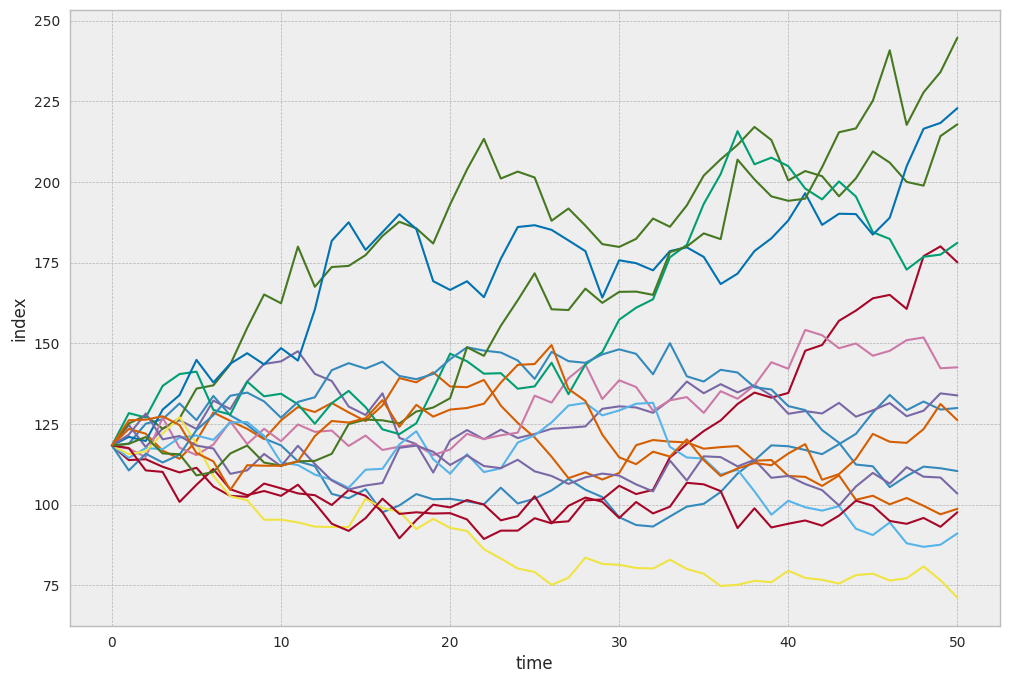

In [181]:
plt.figure(figsize=(12,8))
plt.plot(ST[:,:15],lw=1.5)
plt.xlabel('time')
plt.ylabel('index')

focused on European-style options, and in addition to pricing, also assessed risk using Value at Risk (VaR).

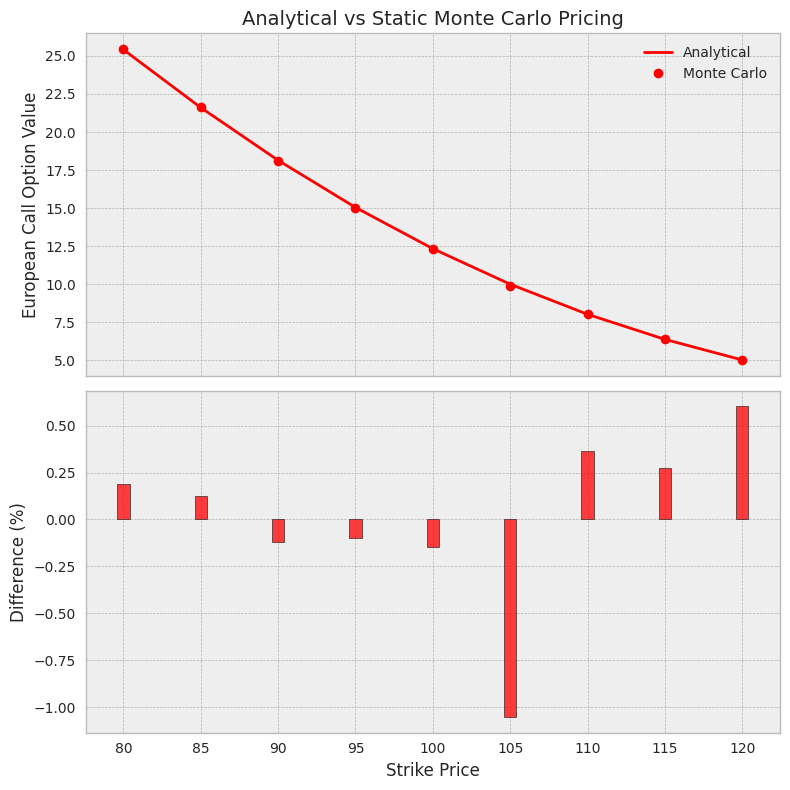

In [185]:
# Black-Scholes-Merton formula for European call option pricing
def bsm_call_value(S, K, T, ir, V):
    d1 = (np.log(S/K) + (ir + 0.5 * V**2) * T) / (V * np.sqrt(T))
    d2 = d1 - V * np.sqrt(T)
    return S * norm.cdf(d1) - K * np.exp(-ir*T) * norm.cdf(d2)

# ----- Parameter Setup -----
S0 = 100      # Initial stock price
ir = 0.05     # Risk-free interest rate
V = 0.25      # Volatility
T = 1.0       # Time to maturity (in years)
I = 100000    # Number of Monte Carlo simulations

# List of strike prices
strikes = [80, 85, 90, 95, 100, 105, 110, 115, 120]

# Lists to store results
analytic_prices = []
mc_prices = []

# 1. Analytical & Static Monte Carlo Calculation

for K in strikes:
    # 1) Analytical price
    analytic_price = bsm_call_value(S0, K, T, ir, V)
    analytic_prices.append(analytic_price)

    # 2) Static Monte Carlo simulation
    Z = npr.standard_normal(I)
    ST = S0 * np.exp((ir - 0.5 * V**2) * T + V * np.sqrt(T) * Z)
    payoffs = np.maximum(ST - K, 0)   # Call option payoff
    mc_price = np.exp(-ir*T) * np.mean(payoffs)
    mc_prices.append(mc_price)

# 2. Compute Percentage Difference
analytic_arr = np.array(analytic_prices)
mc_arr = np.array(mc_prices)
difference_percent = 100.0 * (mc_arr - analytic_arr) / analytic_arr  # Percentage difference

# 3. Visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

# (1) Upper plot: Analytical price (line) vs Monte Carlo price (points)
ax1.plot(strikes, analytic_arr, 'r-', label='Analytical')
ax1.plot(strikes, mc_arr, 'ro', label='Monte Carlo')
ax1.set_ylabel("European Call Option Value", fontsize=12)
ax1.legend(loc='upper right')
ax1.set_title("Analytical vs Static Monte Carlo Pricing", fontsize=14)

# (2) Lower plot: Percentage difference (bar chart)
ax2.bar(strikes, difference_percent, color='red', edgecolor='black', alpha=0.75)
ax2.set_xlabel("Strike Price", fontsize=12)
ax2.set_ylabel("Difference (%)", fontsize=12)

plt.tight_layout()
plt.show()


Text(0, 0.5, 'frequency')

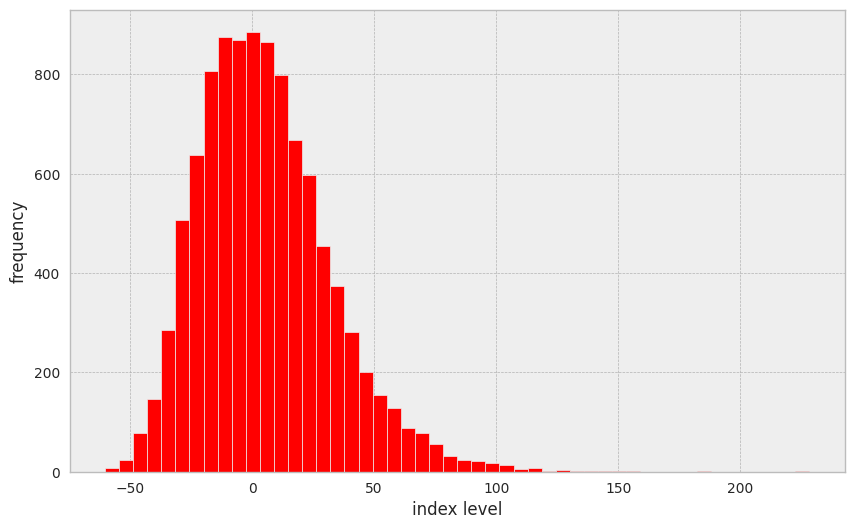

In [186]:
# ----- Parameters for Geometric Brownian Motion -----
S0 = 100       # Initial stock price
ir = 0.05       # Risk-free rate
V = 0.25   # Volatility
T = 1.0        # Time to maturity (years)
I = 10000      # Number of Monte Carlo simulations

Z = npr.standard_normal(I)
ST = S0 * np.exp((ir - 0.5 * V**2) * T + V * np.sqrt(T) * Z)
R_GBM = np.sort(ST- S0)

plt.figure(figsize=(10,6))
plt.hist(R_GBM,bins=50,color='red')
plt.xlabel('index level')
plt.ylabel('frequency')

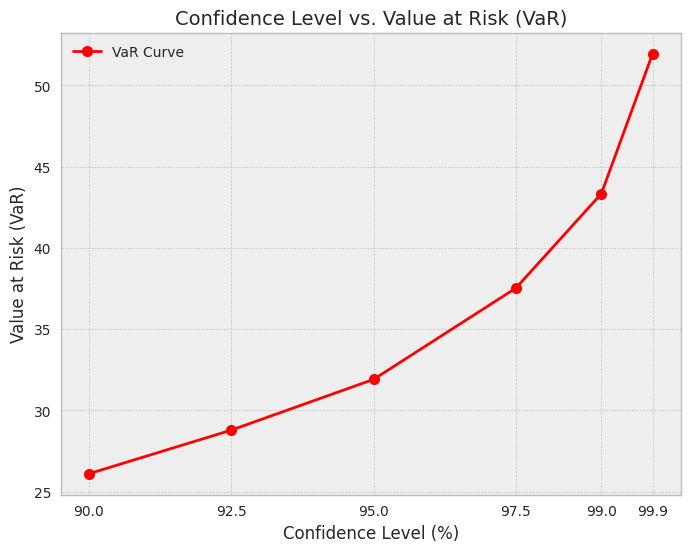

In [187]:
# Define confidence levels
confidence_levels = [90,92.5,95,97.5,99,99.9]  # Confidence levels in percentages
VaR_values = []

# Compute Value at Risk (VaR) for each confidence level
for c in confidence_levels:
    VaR = -scs.scoreatpercentile(R_GBM, 100 - c)  # Negative to represent loss
    VaR_values.append(VaR)

# Visualization: Confidence Level vs. Value at Risk
plt.figure(figsize=(8, 6))
plt.plot(confidence_levels, VaR_values, 'ro-', linewidth=2, markersize=8, label="VaR Curve")

# Graph settings
plt.xlabel("Confidence Level (%)", fontsize=12)
plt.ylabel("Value at Risk (VaR)", fontsize=12)
plt.title("Confidence Level vs. Value at Risk (VaR)", fontsize=14)
plt.xticks(confidence_levels)  # Show only the chosen confidence levels
plt.grid(True, linestyle="--", alpha=0.7)
plt.legend()
plt.show()